No handles with labels found to put in legend.


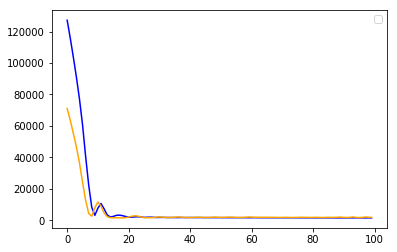

(8, 4)
[[332.12915 333.1751  335.20908 332.8779 ]
 [333.14227 336.90472 340.59445 337.81866]
 [362.36975 359.51746 359.08777 359.51147]
 [314.9548  318.1069  321.8294  318.99188]
 [293.47552 294.619   297.90854 297.118  ]
 [283.94565 284.33893 285.84695 284.8303 ]
 [271.88474 274.96286 277.8268  275.53793]
 [201.93393 204.71255 207.86902 207.07622]]
(8, 4, 4)
cnn: [41.103] 17.4, 52.6, 46.4, 39.2
41.103009647942095 [17.43870524926921, 52.581573009958944, 46.43037494852838, 39.15507156987225]


No handles with labels found to put in legend.


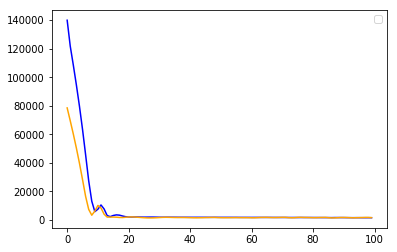

(9, 4)
[[342.36755 341.16257 337.4965  338.96436]
 [341.94174 340.94073 337.29727 338.5833 ]
 [344.51724 343.87247 341.0038  342.63327]
 [388.5214  387.17767 379.6892  383.11145]
 [326.63147 325.9192  323.1945  324.6185 ]
 [316.89627 352.40704 372.28442 376.55746]
 [288.59692 289.13846 284.72308 286.19803]
 [279.09467 278.83966 277.3348  279.52036]
 [210.4084  242.44208 263.88962 271.756  ]]
(9, 4, 4)
cnn: [46.615] 24.1, 54.2, 53.5, 48.0
46.615110737841334 [24.133792434502922, 54.223186911317036, 53.527127871981016, 48.00132125358782]


No handles with labels found to put in legend.


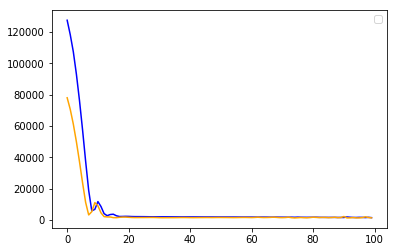

(10, 4)
[[343.41898 342.07684 337.21564 331.71808]
 [342.0553  338.2951  332.22476 331.36536]
 [343.09393 338.38602 332.00626 331.2293 ]
 [342.92328 339.79333 332.70883 329.7783 ]
 [379.2955  380.66418 375.3085  372.2515 ]
 [324.82047 322.19873 315.70905 312.91898]
 [300.50754 300.63065 299.20065 293.24286]
 [289.42883 284.5112  279.41165 278.8816 ]
 [280.59222 278.70737 273.6061  271.50058]
 [207.19896 209.60129 211.26607 206.64772]]
(10, 4, 4)
cnn: [38.799] 20.1, 49.6, 42.7, 36.5
38.7986889443438 [20.131859694065128, 49.64322277322036, 42.66459887767793, 36.487583035239794]


No handles with labels found to put in legend.


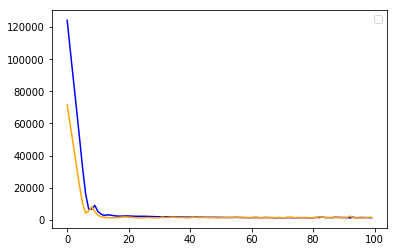

(11, 4)
[[361.4366  364.85468 362.93042 360.53323]
 [331.47308 337.37747 340.22333 341.16205]
 [336.11743 338.62234 337.46732 336.19992]
 [335.07663 337.0132  335.001   333.58273]
 [336.94128 341.1498  342.48132 342.4626 ]
 [358.07065 359.02997 355.1482  352.55902]
 [319.57443 323.2101  323.46085 323.1991 ]
 [314.46173 325.89905 332.39896 334.18027]
 [294.0073  299.52744 300.22684 299.47952]
 [276.93304 282.23145 283.32236 283.76523]
 [242.29234 263.3489  278.9542  285.33896]]
(11, 4, 4)
cnn: [37.352] 15.6, 45.0, 43.8, 37.4
37.351537885996144 [15.550071935272253, 44.99799643530053, 43.79660276158823, 37.36017526666869]


No handles with labels found to put in legend.


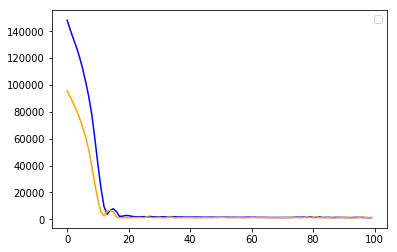

(12, 4)
[[331.3978  335.56903 323.31885 326.20947]
 [348.62943 351.20303 335.64294 341.11343]
 [333.01447 338.5875  331.95038 332.7482 ]
 [337.7164  342.51758 330.4501  333.09772]
 [338.09207 342.4744  329.84985 332.90466]
 [332.5839  341.2652  332.80692 338.23236]
 [355.14194 358.42282 343.2882  347.96698]
 [321.20905 326.4338  317.306   319.41046]
 [306.92154 312.08722 309.93265 311.46664]
 [282.8377  286.1493  275.6623  278.3281 ]
 [265.7932  274.63785 268.99878 275.97913]
 [223.00587 228.96107 233.56538 233.6806 ]]
(12, 4, 4)
cnn: [32.435] 14.0, 41.6, 35.3, 32.2
32.43486437704079 [13.96157969936383, 41.58007280228733, 35.31474725715306, 32.20438126786967]


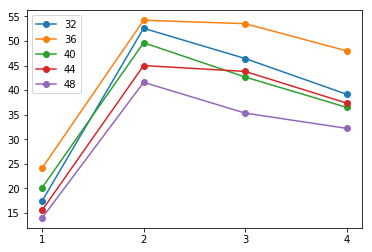

           0          1          2          3
0  17.438705  52.581573  46.430375  39.155072
1  24.133792  54.223187  53.527128  48.001321
2  20.131860  49.643223  42.664599  36.487583
3  15.550072  44.997996  43.796603  37.360175
4  13.961580  41.580073  35.314747  32.204381


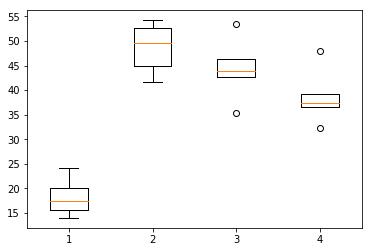

In [4]:
# univariate multi-step lstm for the power usage dataset
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from pandas import DataFrame
import pandas as pd
from keras import optimizers
import keras.backend as K

# split a univariate dataset into train/test sets
def split_dataset(data,n):
	# split into standard weeks
	train, test = data[0:-n], data[-n:]    
	# restructure into windows of weekly data
	train = array(split(train, len(train)/4))
	test = array(split(test, len(test)/4))    
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	mae_scores = list()      
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		mae = mean_absolute_error(actual[:, i], predicted[:, i])            
		# store
		scores.append(rmse)
		mae_scores.append(mae)        
	# calculate overall RMSE
	s = 0
	rmse_=DataFrame(scores)           
	mae_=DataFrame(mae_scores)    
	sonuc=pd.concat([rmse_, mae_], axis=1, ignore_index=True)        
	export_sonuc= sonuc.to_excel (r'C:\Users\sezgi.sener\Desktop\New folder\deep_learning_time_series_forecasting\code\MULTISTEP\LSTM\univariate_lstm_sonuc.xlsx', index = None, header=True)        
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)
# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=4):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train,test, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	test_x, test_y = to_supervised(test, n_input)
	# define parameters
	verbose, epochs, batch_size,n_nodes = 0, 100, 50, 200
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# define model
	model = Sequential()
	model.add(LSTM(n_nodes, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	plot_model(model, show_shapes=True, to_file='univariate_lstm.png')  
	initial_weights = model.get_weights()    
	# fit network
	repeats=1
	for i in range(repeats):
		model.set_weights(initial_weights)      
		model.compile(loss='mse', optimizer='adam', metrics=['mse','accuracy','mape'])          
		aa=model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,validation_data=(test_x, test_y), verbose=verbose) 
		pyplot.plot(aa.history['loss'],  color='blue')
		pyplot.plot(aa.history['val_loss'], color='orange')
		#print('%d) TrainRMSE=%f, TestRMSE=%f' % (i, xx.history['loss'].iloc[-1], xx.history['val_loss'].iloc[-1]))
		model.reset_states() 
		#reset_weights(model)         
	pyplot.savefig('epochs_diagnostic_lstm.png')   
	pyplot.legend()
	pyplot.show()      
	xx=model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast  
	yhat = yhat[0]    
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, test,n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	print(predictions.shape) 
	print(predictions)     
	print(test.shape)       
	pred=pd.DataFrame(predictions)   
	test_=pd.DataFrame(test[:,:,0])    
	pred=pd.concat([pred, test_], axis=1, ignore_index=True)
	export_pred = pred.to_excel (r'C:\Users\sezgi.sener\Desktop\New folder\deep_learning_time_series_forecasting\code\MULTISTEP\LSTM\univariate_lstm_predictions.xlsx', index = None, header=True)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('MyData_weeks.csv', header=0, infer_datetime_format=True, 
                   parse_dates=['Weeks'], index_col=['Weeks'])# split into train and test
son = list()
for n in [8,9,10,11,12,13]:
	#print(n)    
	train, test = split_dataset(dataset.values,n*4)
	# define the names and functions for the models we wish to evaluate
	n_input =4
	score, scores = evaluate_model(train, test, n_input)
	# summarize scores
	summarize_scores('cnn', score, scores)
	# evaluate each model
	print(score,scores)
	son.append(scores)
weeks = ['1', '2', '3', '4']
a=0
for i in [8,9,10,11,12,13]:
	pyplot.plot(weeks, DataFrame(son).T[a], marker='o', label=i*4)   
	a=a+1    
pyplot.savefig('multistep_lstm.png',show_shapes=True, show_layer_names=True) 
pyplot.legend()
pyplot.show()
print(DataFrame(son))
pyplot.boxplot(DataFrame(son).T)
pyplot.show()